In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

importing data from mogodb

In [2]:
import pymongo
client = pymongo.MongoClient("mongodb+srv://Prikshit7766:<password>@cluster0.bb7u7jb.mongodb.net/?retryWrites=true&w=majority")
db = client.test
database=client["AdultCensus"]

In [3]:
#select database
db = client["AdultCensus"]
#select the collection within the database
train = db.data_training
#convert entire collection to Pandas dataframe
train = pd.DataFrame(list(train.find()))

In [4]:
#select database
db = client["AdultCensus"]
#select the collection within the database
test = db.data_testing
#convert entire collection to Pandas dataframe
test= pd.DataFrame(list(test.find()))

In [5]:
train.head()

,_id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,636aa5cfc9973cfedbc02c61,41.0,3.0,98823.0,9.0,13.0,1.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,636aa5cfc9973cfedbc02c62,31.0,1.0,132601.0,11.0,9.0,2.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,636aa5cfc9973cfedbc02c63,31.0,1.0,210008.0,11.0,9.0,2.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,636aa5cfc9973cfedbc02c64,31.0,1.0,115488.0,11.0,9.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,636aa5cfc9973cfedbc02c65,58.0,1.0,119751.0,11.0,9.0,1.0,8.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
test.head()

,_id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,636aa605c9973cfedbc0b1ee,42.0,1.0,54102.0,15.0,10.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,636aa605c9973cfedbc0b1ef,55.0,6.0,186791.0,11.0,9.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,636aa605c9973cfedbc0b1f0,22.0,1.0,361487.0,11.0,9.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,636aa605c9973cfedbc0b1f1,39.0,3.0,164515.0,11.0,9.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,636aa605c9973cfedbc0b1f2,34.0,3.0,167063.0,11.0,9.0,2.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
train=train.drop("_id",axis=1)
test=test.drop("_id",axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           34189 non-null  float64
 1   workclass                     34189 non-null  float64
 2   fnlwgt                        34189 non-null  float64
 3   education                     34189 non-null  float64
 4   education-num                 34189 non-null  float64
 5   marital-status                34189 non-null  float64
 6   occupation                    34189 non-null  float64
 7   capital-gain                  34189 non-null  float64
 8   capital-loss                  34189 non-null  float64
 9   hours-per-week                34189 non-null  float64
 10  race_ Asian-Pac-Islander      34189 non-null  float64
 11  race_ Black                   34189 non-null  float64
 12  race_ Other                   34189 non-null  float64
 13  r

In [9]:
train.isna().sum()

age                             0
workclass                       0
fnlwgt                          0
education                       0
education-num                   0
marital-status                  0
occupation                      0
capital-gain                    0
capital-loss                    0
hours-per-week                  0
race_ Asian-Pac-Islander        0
race_ Black                     0
race_ Other                     0
race_ White                     0
sex_ Male                       0
relationship_ Not-in-family     0
relationship_ Other-relative    0
relationship_ Own-child         0
relationship_ Unmarried         0
relationship_ Wife              0
 United-States                  0
 Mexico                         0
 Philippines                    0
 Germany                        0
 Puerto-Rico                    0
 Canada                         0
 El-Salvador                    0
 India                          0
 Cuba                           0
 England      

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           14653 non-null  float64
 1   workclass                     14653 non-null  float64
 2   fnlwgt                        14653 non-null  float64
 3   education                     14653 non-null  float64
 4   education-num                 14653 non-null  float64
 5   marital-status                14653 non-null  float64
 6   occupation                    14653 non-null  float64
 7   capital-gain                  14653 non-null  float64
 8   capital-loss                  14653 non-null  float64
 9   hours-per-week                14653 non-null  float64
 10  race_ Asian-Pac-Islander      14653 non-null  float64
 11  race_ Black                   14653 non-null  float64
 12  race_ Other                   14653 non-null  float64
 13  r

In [11]:
test.isna().sum()

age                             0
workclass                       0
fnlwgt                          0
education                       0
education-num                   0
marital-status                  0
occupation                      0
capital-gain                    0
capital-loss                    0
hours-per-week                  0
race_ Asian-Pac-Islander        0
race_ Black                     0
race_ Other                     0
race_ White                     0
sex_ Male                       0
relationship_ Not-in-family     0
relationship_ Other-relative    0
relationship_ Own-child         0
relationship_ Unmarried         0
relationship_ Wife              0
 United-States                  0
 Mexico                         0
 Philippines                    0
 Germany                        0
 Puerto-Rico                    0
 Canada                         0
 El-Salvador                    0
 India                          0
 Cuba                           0
 England      

In [12]:
x_train=train.drop("salary_ >50K",axis=1)
y_train=train["salary_ >50K"]
x_test=test.drop("salary_ >50K",axis=1)
y_test=test["salary_ >50K"]

## standardize the datasets
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(x_train)
s_x_test=scaler.transform(x_test)

**model building**

Support Vector Machine

In [14]:
from sklearn.svm import SVC
clf1 = SVC()

In [15]:
clf1.fit(s_x_train,y_train)

SVC()

In [16]:
# traing accuracy
clf1.score(s_x_train,y_train)

0.8538418789669192

In [18]:
y_pred = clf1.predict(s_x_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

- Confusion Matrix

In [20]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[10408,   739],
       [ 1494,  2012]], dtype=int64)

**accuracy**

In [54]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8476079983621101

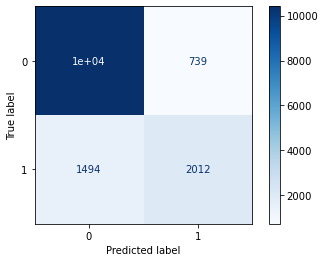

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf1,s_x_test,y_test,cmap=plt.cm.Blues)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.73      0.57      0.64      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(s_x_train,y_train)

LogisticRegression()

In [24]:
# traing accuracy
clf2.score(s_x_train,y_train)

0.8436046681681243

In [25]:
y_pred2 = clf2.predict(s_x_test)

In [26]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred2)
conf_mat

array([[10370,   777],
       [ 1542,  1964]], dtype=int64)

**accuracy**

In [55]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.8417388930594417

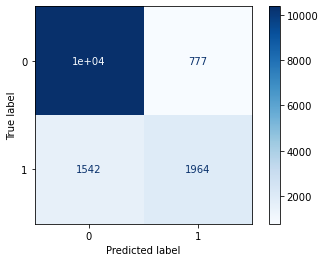

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2,s_x_test,y_test,cmap=plt.cm.Blues)

In [28]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.72      0.56      0.63      3506

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653



**using grid search cv with these models with SVC**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [38]:
classifier = SVC()

In [39]:
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1],
'kernel': ['rbf','poly','sigmoid','linear'],
'gamma' : ['auto'], 
'degree': [1,2,3]
}

In [40]:
Grid_model = GridSearchCV(classifier,param_grid)

In [41]:
Grid_model.fit(s_x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [1, 2, 3],
                         'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [42]:
Grid_model.best_params_

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

using these parameters for the model creation

In [45]:
svc=SVC(C= 1, degree= 1, gamma= 'auto', kernel='rbf')

In [46]:
svc.fit(s_x_train,y_train)

SVC(C=1, degree=1, gamma='auto')

In [47]:
# traing accuracy
svc.score(s_x_train,y_train)

0.8538418789669192

In [48]:
y_pred3 = svc.predict(s_x_test)

In [49]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred3)
conf_mat

array([[10408,   739],
       [ 1494,  2012]], dtype=int64)

**accuracy**

In [53]:
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.8476079983621101

In [ ]:
# accuracy is same evwn after doing gridSearchCV

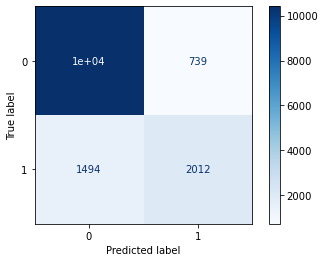

In [50]:
plot_confusion_matrix(svc,s_x_test,y_test,cmap=plt.cm.Blues)

In [51]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.73      0.57      0.64      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



no change after doing grid search

**using grid search cv with these models with LogisticRegression**

In [56]:
log_model_=LogisticRegression()

In [57]:
penalty = ['l1', 'l2', 'elasticnet']
solver=['newton-cg', 'lbfgs', 'sag', "saga"]
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
para_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C,'solver':solver}

In [59]:
Grid_model_=GridSearchCV(log_model_,param_grid=para_grid,cv=10)

In [60]:
Grid_model_.fit(s_x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [61]:
Grid_model_.best_params_

{'C': 3.3598182862837818,
 'l1_ratio': 0.15789473684210525,
 'penalty': 'l2',
 'solver': 'sag'}

using these parameters for the model creation

In [62]:
log_model=LogisticRegression(C= 3.3598182862837818,l1_ratio= 0.15789473684210525,penalty= 'l2',solver= 'sag')

In [91]:
log_model.fit(s_x_train,y_train)

LogisticRegression(C=3.3598182862837818, l1_ratio=0.15789473684210525,
                   solver='sag')

In [92]:
# traing accuracy
log_model.score(s_x_train,y_train)

0.8435754189944135

In [93]:
y_pred4 = log_model.predict(s_x_test)

In [94]:
# Confusion Matrix
conf_mat_ = confusion_matrix(y_test,y_pred4)
conf_mat_

array([[10370,   777],
       [ 1542,  1964]], dtype=int64)

**accuracy**

In [95]:
accuracy = accuracy_score(y_test,y_pred4)
accuracy

0.8417388930594417

In [96]:
# very little increase in the accuracy after doing gridSearchCV

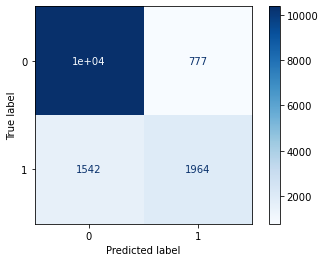

In [97]:
plot_confusion_matrix(log_model,s_x_test,y_test,cmap=plt.cm.Blues)

In [86]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.73      0.57      0.64      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



no increase in the accuracy 
but there is in increas in precision    recall  f1-score  for class 1